With the courtesy of:<br>
1- http://cs231n.stanford.edu/ <br>
2- https://github.com/PetarV-/ 

# 1) What is image?

Image is a matrix whose elements are intensity values between 0 and 255.
0 corresponds to black color, 255 corresponds to white color.
The scales in between corresponds to shades of grey color.
<br>
Color images have 3 channels in RGB.
<br>
Greyscale images have 1 channel.
<br>
Binary images have 1 channel.
<img src='channels.png'>

## Read color image

In [1]:
import cv2
img=cv2.imread('pinkas.png',1)
print(type(img), img.shape)

<class 'numpy.ndarray'> (101, 193, 3)


## Visualize image

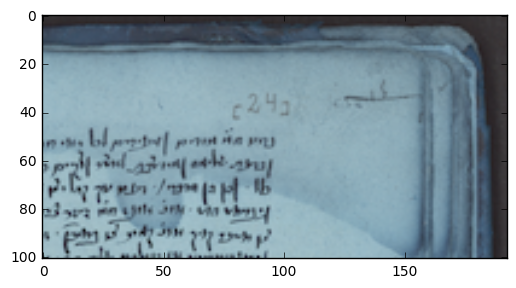

In [2]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

### What is wrong with the visualization?
Image seems blue because opencv uses BGR channel order, instead of RGB. So we need to convert image from BGR to RGB before visualizing it with matplotlib

## Convert BGR to RGB

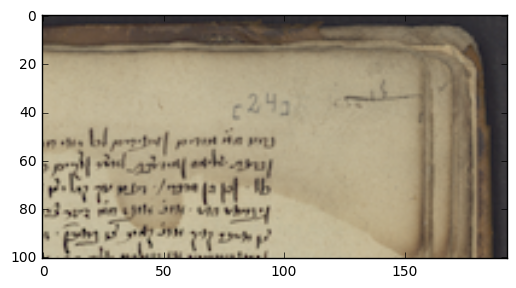

In [3]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

## Convert RGB to gray

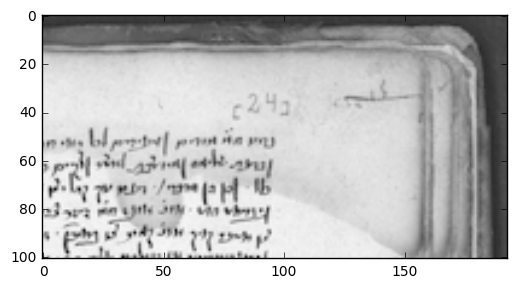

In [4]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')
plt.show()

## Read gray image

<class 'numpy.ndarray'> (101, 193)


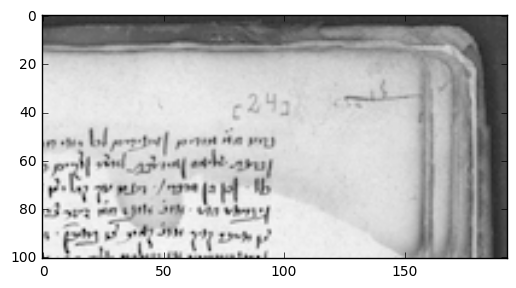

In [5]:
gray_img=cv2.imread('pinkas.png',0)
print(type(gray_img), gray_img.shape)
plt.imshow(gray_img,cmap='gray')
plt.show()

## Resize image

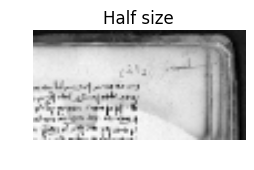

In [6]:
rows,cols=gray_img.shape
resized_img=cv2.resize(gray_img,(cols//2,rows//2))
plt.subplot(121),plt.imshow(resized_img,cmap='gray'),plt.axis('off'),plt.title('Half size')
plt.show()

## Save image

In [7]:
cv2.imwrite('gray_pinkas.png',gray_img)

True

# 2) Image binarization

## Simple thresholding
If the pixel value is greater than threshold (127), its value is assigned to 255
<br>
If the pixel value is less than threshold (127), its value is assigned to 0

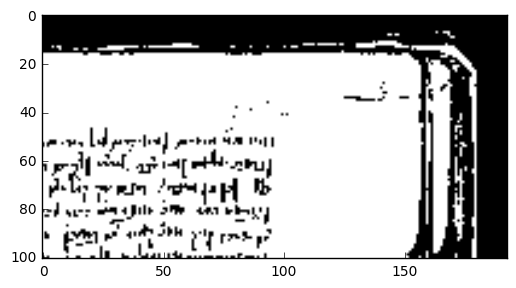

In [8]:
ret,simple_thresh = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
plt.imshow(simple_thresh,cmap='gray')
plt.show()

## Adaptive thresholding
This method calculates uses a different threshold value for every small window in the image.
Threshold value is the wweighted sum of the neighbour pixel values where the eights are taken from a gaussian.
<br>
We set:
<br>
size of window=11 pixels
<br>
constant to be subtracted from weighted sum=7

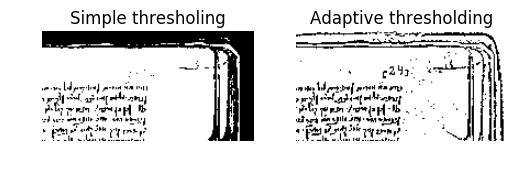

In [9]:
adapt_thresh= cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,7)
plt.subplot(121),plt.imshow(simple_thresh,cmap='gray'),plt.axis('off'),plt.title('Simple thresholing')
plt.subplot(122),plt.imshow(adapt_thresh,cmap='gray'),plt.axis('off'),plt.title('Adaptive thresholding')
plt.show()

### What is the difference?
Page number in the upper right corner has been missed by simple thresholding.

# 3) Histogram
Histogram is a plot with x-axis shows the pixel intensity values and y-axis shows the number of pixels with the intensity value on x-axis.
<br>
We set:
<br>
index of channel=[0]
<br>
mask=None
<br>
number of bins=256
<br>
range=[0,256]

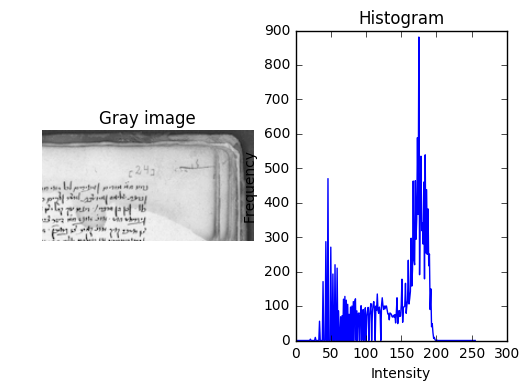

In [10]:
img = cv2.imread('pinkas.png',0)
plt.subplot(121),plt.axis("off"),plt.title("Gray image"),plt.imshow(img,cmap='gray')

histogram = cv2.calcHist([img],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(histogram),plt.xlabel('Intensity'),plt.ylabel('Frequency'),plt.title('Histogram')

plt.show()

## Histogram equalization
Histogram equalization is used to increase the contrast of image.
<br>
Let's say we have 10 pixels with intensity value of 50 in an image with 100 pixels. Than the probability of having a pixel with an intensity value of 50 is equal to 10/100=0.1
<br>
If we divide each value in y-axis by total number of pixels in the image then we will have a probability distribution of intensity values in the image.
<br>
Histogram equalization changes intensity values of pixels such that the image will have a uniform distribution of intensities.

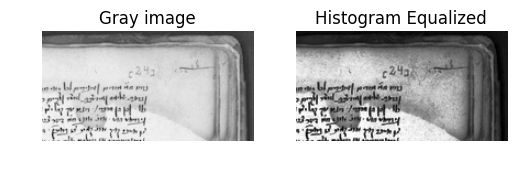

In [11]:
img = cv2.imread('pinkas.png',0)
equalized_img = cv2.equalizeHist(img)
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.axis('off'),plt.title('Gray image')
plt.subplot(122),plt.imshow(equalized_img,cmap='gray'),plt.axis('off'),plt.title('Histogram Equalized')
plt.show()

### How is the histogram of an equalized image?

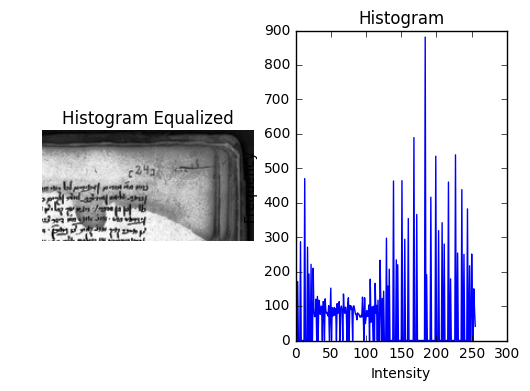

In [12]:
plt.subplot(121),plt.imshow(equalized_img,cmap='gray'),plt.axis('off'),plt.title('Histogram Equalized')

histogram = cv2.calcHist([equalized_img],[0], None, [256], [0,256])
plt.subplot(122),plt.plot(histogram),plt.xlabel('Intensity'),plt.ylabel('Frequency'),plt.title('Histogram')
plt.show()

If the equalized image has a uniform distribution of intensity values then the histogram of the equalized image supposed to have a flat histogram.
<br><br>
Why isn't so?
<br>
Because during discretization of intensity values many of them are assigned to the same intensity value.

# 4) Convolution
<img src='convolution.png'>

Convolution operation is done between a kernel matrix and an image matrix.
<br>
Kernel is flipped, both horizontally and vertically. Summation of multiplications of corresponding elements is the output of convolution for the image matrix element that lies in the center of the kernel matrix.
<br>
In the above the kernel is symmetric hence flipping it horizontally and vertically does not change the things.

## Box blur filter
Box blur filter takes the average of all the pixels under the kernel area and assigns it to image pixel that is under the center pixel of the kernel.
<br>
$\frac{1}{9}
\begin{bmatrix}
1&1&1\\1&1&1\\1&1&1
\end{bmatrix}$

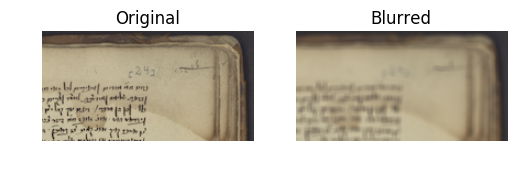

In [13]:
img = cv2.imread('pinkas.png',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.axis('off'),plt.title('Original')
plt.subplot(122),plt.imshow(blur,cmap='gray'),plt.axis('off'),plt.title('Blurred')
plt.show()